In [152]:
### CODE (MODIFIED) FROM https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
#import tools from numpy and scipy...
from numpy import mean
from numpy import std
import numpy as np
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kruskal
from scipy.stats import friedmanchisquare
from scipy.stats import skewnorm
from scipy.stats import norm
from matplotlib import pyplot
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot


In [153]:
#create your own data 
# generate two sets of univariate observations
data1 = norm.rvs(size=500,loc=50)# #normal mean 50
data2 = skewnorm.rvs(5,loc=50,size=500)#skewed normal mean 50
data3 = norm.rvs(size=500,loc=52)#normal mean 52
data4=skewnorm.rvs(5, size=500,loc=52)#skewed normal mean 52
# summarize
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))
print('data3: mean=%.3f stdv=%.3f' % (mean(data3), std(data3)))
print('data4: mean=%.3f stdv=%.3f' % (mean(data4), std(data4)))


data1: mean=50.007 stdv=0.998
data2: mean=50.769 stdv=0.634
data3: mean=52.028 stdv=0.959
data4: mean=52.820 stdv=0.635


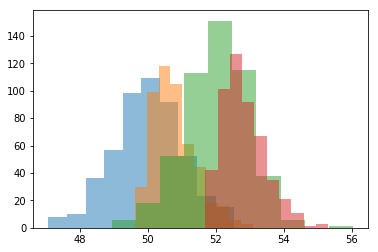

In [154]:
###Is my data normally distributed
#check visually
# histogram plot
a=pyplot.hist(data1,alpha = 0.5)
b=pyplot.hist(data2,alpha = 0.5)
c=pyplot.hist(data3,alpha = 0.5)
d=pyplot.hist(data4,alpha = 0.5)
pyplot.show()

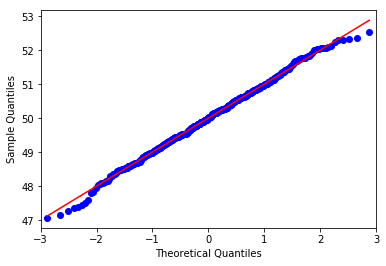

In [162]:
##QQ plot 
#Quantile-Quantile plot: probability plot that plots the quantiles 
#(dividing the range of a probability distribution into continuous intervals with equal probabilities_) of 2 distributions against each other
#theoretical quantiles here:normal distribution
qqplot(data1, line='s')
pyplot.show()

In [157]:
# normality test
stat, p = shapiro(data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.949, p=0.000
Sample does not look Gaussian (reject H0)


In [158]:
# compare samples
# Mann-Whitney U (indep-samples t-test)
stat, p = mannwhitneyu(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')


Statistics=66007.000, p=0.000
Different distribution (reject H0)


In [159]:
# compare samples
# Wilcoxon Signed Rank (paired-samples t-test)
# compare samples
stat, p = wilcoxon(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=21811.000, p=0.000
Different distribution (reject H0)


In [160]:
# compare more than 2 indep samples
# Kruskal-Wallis H-test
# compare samples
stat, p = kruskal(data1, data2, data3)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=716.055, p=0.000
Different distributions (reject H0)


In [161]:
# compare more than 2 paired samples
#Friedman Test
stat, p = friedmanchisquare(data1, data2, data3)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')


Statistics=532.816, p=0.000
Different distributions (reject H0)
